# Support Vector Machine

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

import seaborn as sns; sns.set()

In [2]:
from sklearn.datasets.samples_generator import make_blobs

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
X, Y = make_blobs(n_samples=50,centers=2,random_state=0,cluster_std=.6)

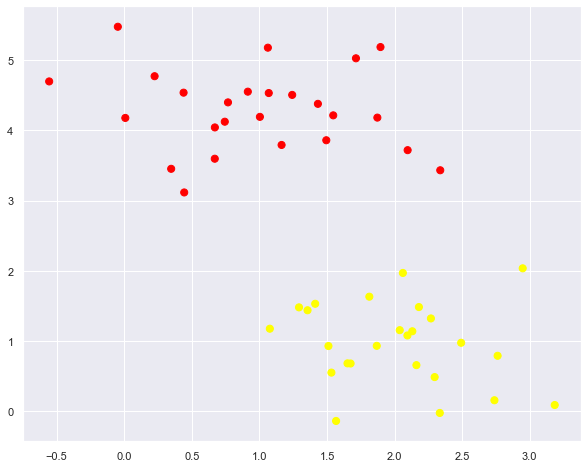

In [4]:
plt.figure(figsize=(10,8))
plt.scatter(X[:,0],X[:,1],c=Y,s=50,cmap="autumn")
plt.show()

# El problema de la separación
* Alternativa: Usar SVM, recuerda que este MAX el width del street

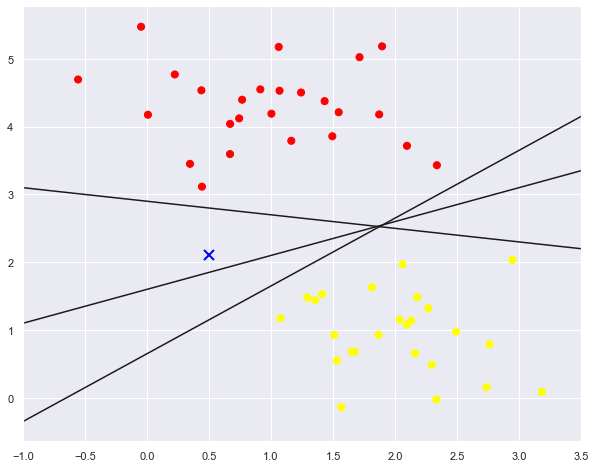

In [7]:
plt.figure(figsize=(10,8))
xx = np.linspace(-1,3.5)
plt.scatter(X[:,0],X[:,1],c=Y,s=50,cmap="autumn")
plt.plot([.5],[2.1],'x',color="blue",markeredgewidth=2,markersize=10)

for a,b in [(1,.65),(.5,1.6),(-.2,2.9)]:
    yy=a*xx+b
    plt.plot(xx,yy,"-k")
plt.xlim(-1,3.5)
plt.show()

## Maximizar el margen

* $d$: Distancia hasta encontrarnos con el punto próximo (support vector), básicamente es la perpendicular a cada recta y calcular la distancia a cada punto, también llamado la <strong>proyección ortogonal</strong>

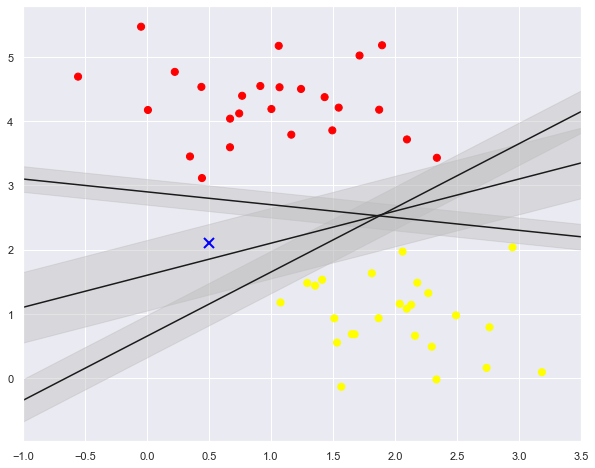

In [9]:
plt.figure(figsize=(10,8))
xx = np.linspace(-1,3.5)
plt.scatter(X[:,0],X[:,1],c=Y,s=50,cmap="autumn")
plt.plot([.5],[2.1],'x',color="blue",markeredgewidth=2,markersize=10)

# (x1,x2,w)
for a,b,d in [(1,.65,.33),(.5,1.6,.55),(-.2,2.9,.2)]:
    yy=a*xx+b
    plt.plot(xx,yy,"-k")
    plt.fill_between(xx,yy-d,yy+d,edgecolor="none",color="#BBBBBB",alpha=.4)
plt.xlim(-1,3.5)
plt.show()

In [22]:
X[(X[:,0]>2.)&(X[:,1]>3.)], Y[(X[:,0]>2.)&(X[:,1]>3.)]

(array([[2.33812285, 3.43116792],
        [2.09680487, 3.7174206 ]]),
 array([0, 0]))

In [34]:
px, py = 2.33812285, 3.43116792
p = np.array([[px,py]])
p

array([[2.33812285, 3.43116792]])

In [25]:
w, b, d = .5,1.6,.55

In [35]:
n = np.array([[1,w]])
print(n.shape, n.T.shape)

(1, 2) (2, 1)


In [33]:
n

array([[1. , 0.5]])

In [32]:
n.T

array([[1. ],
       [0.5]])

In [38]:
np.dot(n.T,p)-b

array([[ 0.73812285,  1.83116792],
       [-0.43093858,  0.11558396]])

In [39]:
1*py + -w*px - b

0.6621064950000002